In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

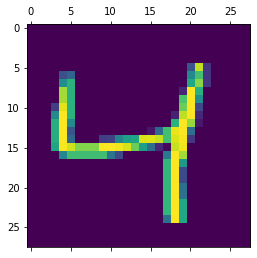

In [21]:
plt.matshow(X_train[2])

In [22]:
y_train[2]

4

In [23]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [24]:
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [25]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4899 - accuracy: 0.8755
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3066 - accuracy: 0.9161
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2854 - accuracy: 0.9214
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2751 - accuracy: 0.9243
Epoch 5/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2681 - accuracy: 0.9261


In [26]:
model.evaluate(X_test_flatten,y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.2658 - accuracy: 0.9276


[0.26577291322350505, 0.9276]

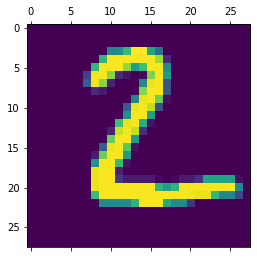

In [33]:
plt.matshow(X_test[1])

In [34]:
y_predict = model.predict(X_test_flatten)
y_predict[0]

array([1.41795135e-05, 1.10919704e-10, 3.84236628e-05, 8.25642701e-03,
       9.71963686e-07, 7.22435871e-05, 1.65218283e-09, 7.56841719e-01,
       5.98983752e-05, 7.23747304e-04], dtype=float32)

In [36]:
np.argmax(y_predict[1])

2

In [37]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [38]:
cn =  tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,   11,  924,   19,    9,    3,   13,   10,   34,    3],
       [   3,    0,   16,  925,    1,   24,    3,   11,   21,    6],
       [   2,    2,    3,    1,  925,    0,   11,    4,    8,   26],
       [   9,    3,    3,   33,   12,  771,   18,    8,   30,    5],
       [   9,    3,    3,    1,    7,    8,  923,    2,    2,    0],
       [   1,    7,   23,    7,    6,    0,    0,  960,    1,   23],
       [   7,   10,    7,   21,    9,   23,   10,   12,  869,    6],
       [  11,    7,    1,   11,   36,    5,    0,   28,    8,  902]])>

Text(69.0, 0.5, 'Truth')

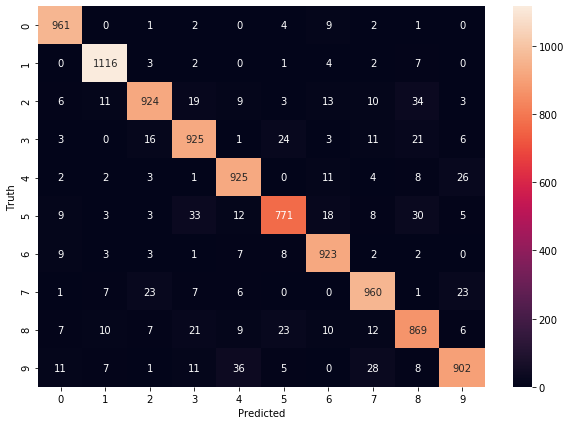

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add Hidden Layers

In [42]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2975 - accuracy: 0.9171
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1422 - accuracy: 0.9587
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1007 - accuracy: 0.9699
Epoch 4/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0798 - accuracy: 0.9759
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0641 - accuracy: 0.9806


In [43]:
model.evaluate(X_test_flatten,y_test)

10000/10000 [==============================] - 1s 100us/sample - loss: 0.0789 - accuracy: 0.9752


[0.07891318253264762, 0.9752]

Text(69.0, 0.5, 'Truth')

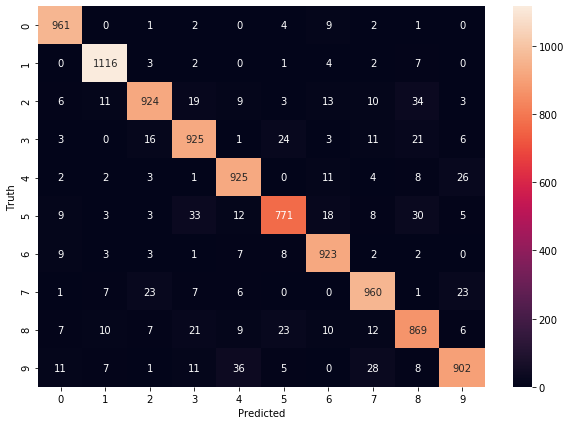

In [45]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2925 - accuracy: 0.9182
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1371 - accuracy: 0.9602
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0968 - accuracy: 0.9714
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0763 - accuracy: 0.9766
Epoch 5/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0610 - accuracy: 0.9820


In [48]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 100us/sample - loss: 0.0908 - accuracy: 0.9728


[0.09075025967676192, 0.9728]